<a href="https://colab.research.google.com/github/trantheanh/100DaysOfML/blob/master/Visualize_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing the required Keras modules containing model and layers
import tensorflow as tf
from tensorflow.keras import layers
model1 = tf.keras.Sequential()


In [0]:
# # X axis
# x = np.array(range(1,11))

# # REAL FUNCTION Y axis
# real_y = np.array([autoregressive_func([1,1])(t) for t in x])

# # HYPOTHESIS FUNCTION Y axis
# degree = 2#np.random.randint(low=1, high=10)
# params = np.random.rand(degree) * 5
# hypothesis_y = np.array([polynomio_func(params)(t) for t in x])

# fig, ax = plt.subplots(2, 2, sharex=True)

# fig.set_figheight(9)
# fig.set_figwidth(12)

# ax[0][0].plot(x, real_y, 'g')
# # ax[0][0].axis([0, 10, 0, 200])
# ax[0][0].set_ylabel("REAL FUNCTION")

# ax[0][1].plot(x, hypothesis_y, 'b')
# # ax[0][1].axis([0, 10, 0, 200])
# ax[0][1].set_ylabel("HYPOTHESIS FUNCTION")

# # ax[1][0].axis([0, 10, 0, 200])
# ax[1][0].plot(x, real_y, 'g')
# ax[1][0].plot(x, hypothesis_y, 'b')
# ax[1][0].set_ylabel("2 FUNCTION")

# # ax[1][1].axis([0, 10, 0, 200])
# ax[1][1].plot(x, real_y, x, hypothesis_y, color="black")
# ax[1][1].fill_between(x, real_y, hypothesis_y,  where=real_y>hypothesis_y, facecolor="red", interpolate=True)
# ax[1][1].fill_between(x, real_y, hypothesis_y,  where=real_y<hypothesis_y, facecolor="green", interpolate=True)
# ax[1][1].set_ylabel("THE DIFFERENCE")
# print("")

RuntimeError: ignored

In [0]:
print(tf.__version__)
print("GPU Available: ", tf.test.is_gpu_available())
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255.
x_test /= 255.
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

# Creating a Sequential Model and adding the layers
model = tf.keras.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), input_shape=input_shape))
model.add(layers.Activation(activation=tf.nn.relu))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3)))
model.add(layers.Activation(activation=tf.nn.relu))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(layers.Conv2D(128, kernel_size=(3, 3)))
model.add(layers.Activation(activation=tf.nn.relu))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(layers.Flatten())  # Flattening the 2D arrays for fully connected layers
model.add(layers.Dense(128, activation=tf.nn.relu))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# model.fit(x=x_train, y=y_train, epochs=10)

model.fit(x=x_train, y=y_train, epochs=30, validation_split=0.2, batch_size=32)

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

1.14.0
GPU Available:  True
x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000
Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 12s 254us/sample - loss: 0.1177 - acc: 0.9645 - val_loss: 0.0536 - val_acc: 0.9830
Epoch 2/30
48000/48000 [==============================] - 12s 248us/sample - loss: 0.0449 - acc: 0.9853 - val_loss: 0.0490 - val_acc: 0.9862
Epoch 3/30
48000/48000 [==============================] - 12s 248us/sample - loss: 0.0301 - acc: 0.9899 - val_loss: 0.0433 - val_acc: 0.9865
Epoch 4/30
48000/48000 [==============================] - 12s 247us/sample - loss: 0.0216 - acc: 0.9928 - val_loss: 0.0417 - val_acc: 0.9901
Epoch 5/30
48000/48000 [==============================] - 12s 246us/sample - loss: 0.0157 - acc: 0.9951 - val_loss: 0.0466 - val_acc: 0.9880
Epoch 6/30
48000/48000 [==============================] - 12s 251us/sample - loss: 0.0145 - acc: 0.9955 - val_loss: 

In [0]:
class model():
    
    def __init__(self,
                 X_train,
                 Y_train,
                 num_step = 10000,
                 lr = 0.1):
        self.X_train = X_train
        self.Y_train = Y_train
        self.num_step = num_step
        self.lr = lr
        
    def initialize(self):
        self.W = np.random.rand(1, self.X_train.shape[0])
        self.b = 0
        
    # Prediction of datas point
    # X : matrix (n x m)
    # W : vector n dimension
    # b : scalar
    def predict(self,X):
        Y_hat = np.dot(self.W, X) + self.b
        return Y_hat

    # Gradient on data set
    # X : matrix (m x n)
    # Y : matrix (m x 1)
    # W : Vector n dimension
    # b : scalar
    def grad(self):
        m = self.Y_train.shape[1] * 1.0
        Y_hat = self.predict(self.X_train)
        dW = 1/m * np.dot((Y_hat - self.Y_train), np.transpose(self.X_train))
        db = 1/m * np.sum(Y_hat - self.Y_train)    
        return {"dW":dW, "db" : db}

    def loss(self):
        m = self.Y_train.shape[1] * 1.0
        Y_hat = self.predict(self.X_train) 
        return 1/(2.0*m) * np.sum(np.square(Y_hat - self.Y_train))

    def train(self):
        self.initialize()
        self.losses = []
        for i in range(self.num_step):
            gradient = self.grad()
            self.W = self.W - self.lr * gradient["dW"]
            self.b = self.b - self.lr * gradient["db"]
            self.losses.append(self.loss())

            if i%500==0:
                print("At step " + str(i) + " " + str(self.losses[-1]))
                
    def train_single_step(self):
        gradient = self.grad()
        self.W = self.W - self.lr * gradient["dW"]
        self.b = self.b - self.lr * gradient["db"]
        print(self.loss())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


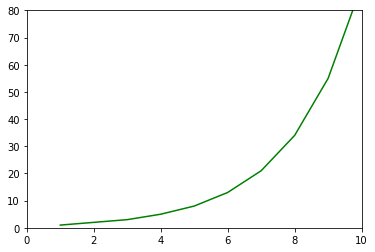

In [10]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# Define polynomio function
def autoregressive_func(params=[0]):
  
  def func(x):
    result = 0
    if x < len(params):
      return 1
    
    for i in range(len(params)):
      result += params[i] * func(x-i-1)
      
    return result
  
  return func

def polynomio_func(params=[0]):
  
  def func(x):
    result = 0
    for i in range(len(params)):
      result += params[i] * (x**i)
      
    return result
  
  return func

def real_function(x):
  real_y = np.array([autoregressive_func([1,1])(t) for t in x])
  return real_y

def hypothesis_function(x, params):
  hypothesis_y = np.array([polynomio_func(params)(t) for t in x])

def draw_animation(x, real_function, hypothesis_function):
  # First set up the figure, the axis, and the plot element we want to animate
  fig = plt.figure()
  ax = plt.axes(xlim=(0, 10), ylim=(0, 80))
  
  # Plot Real function with Green
  real_y = real_function(x)
  ax.plot(x, real_y, 'g')
  
  line, = ax.plot([], [], lw=2)

  # initialization function: plot the background of each frame
  def init():
      line.set_data([], [])
      return line,

  # animation function.  This is called sequentially
  def animate(i):
      x = np.array(range(1,11))
      
      degree = np.random.randint(low=1, high=10)
      params = np.random.rand(degree) * 5
      hypothesis_y = hypothesis_function(x, params)
      line.set_data(x, hypothesis_y)
      return line,

  # call the animator.  blit=True means only re-draw the parts that have changed.
  anim = animation.FuncAnimation(fig, animate, init_func=init,
                                 frames=200, interval=20, blit=True)

  anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

  plt.show()

draw_animation(
    x=np.array(range(1,11)), 
    real_function=real_function, 
    hypothesis_function=hypothesis_function)
